In [2]:
import sys
print(f"Python путь: {sys.executable}")
print(f"Версия Python: {sys.version}")

Python путь: c:\Users\Zver\Desktop\pet-projects\data_analysis\films\film-ratings-analytics\.venv\Scripts\python.exe
Версия Python: 3.13.5 (tags/v3.13.5:6cb20a2, Jun 11 2025, 16:15:46) [MSC v.1943 64 bit (AMD64)]


In [6]:
# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

# Настройка визуализации
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)

print("Библиотеки загружены")

Библиотеки загружены


Загрузка подготовленных данных

In [8]:
movies = pd.read_csv('../data/processed/movies.csv')
ratings = pd.read_csv('../data/processed/ratings.csv')
tags = pd.read_csv('../data/processed/tags.csv')
links = pd.read_csv('../data/processed/links.csv')

print("Данные загружены:")
print(f"Фильмы: {movies.shape}")
print(f"Рейтинги: {ratings.shape}")
print(f"Теги: {tags.shape}")
print(f"Ссылки: {links.shape}")

display(movies.head(3))
display(ratings.head(3))

Данные загружены:
Фильмы: (86537, 3)
Рейтинги: (500000, 4)
Теги: (2328315, 4)
Ссылки: (86537, 3)


,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance


,userId,movieId,rating,timestamp
0,23474,8636,2.0,1623093417
1,327932,480,2.0,975014893
2,32973,5481,0.5,1057540085


Базовая информация о данных

In [9]:
print("Информация о данных:")
print("\nРейтинги:")
print(ratings['rating'].describe())
print(f"Уникальных пользователей: {ratings['userId'].nunique()}")
print(f"Уникальных фильмов: {ratings['movieId'].nunique()}")

print("\nФильмы:")
print(f"Всего фильмов: {len(movies)}")
print(f"Уникальных жанров: {movies['genres'].nunique()}")

ИНФОРМАЦИЯ О ДАННЫХ:

Рейтинги:
count    500000.000000
mean          3.545994
std           1.062999
min           0.500000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64
Уникальных пользователей: 152650
Уникальных фильмов: 20783

Фильмы:
Всего фильмов: 86537
Уникальных жанров: 1796


Визуализация распределения рейтингов

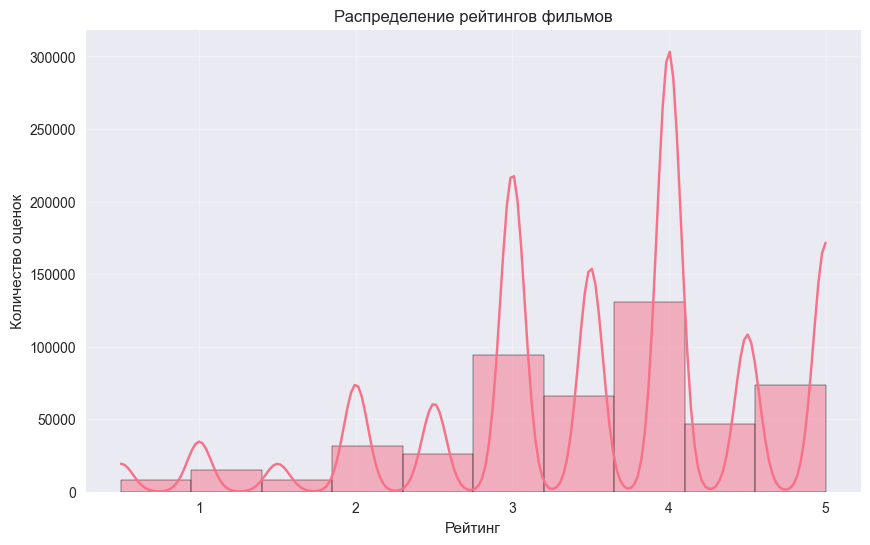

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(ratings['rating'], bins=10, kde=True)
plt.title('Распределение рейтингов фильмов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество оценок')
plt.grid(True, alpha=0.3)
plt.show()

Разбор жанров (многие фильмы в нескольких жанрах)

Статистика по жанрам:
genre
Drama          33681
Comedy         22830
Thriller       11675
Romance        10172
Action          9563
Documentary     9283
Horror          8570
Crime           6917
Adventure       5349
Sci-Fi          4850
Animation       4579
Children        4367
Mystery         3972
Fantasy         3821
War             2301
Western         1690
Musical         1059
Film-Noir        354
IMAX             195
Name: count, dtype: int64


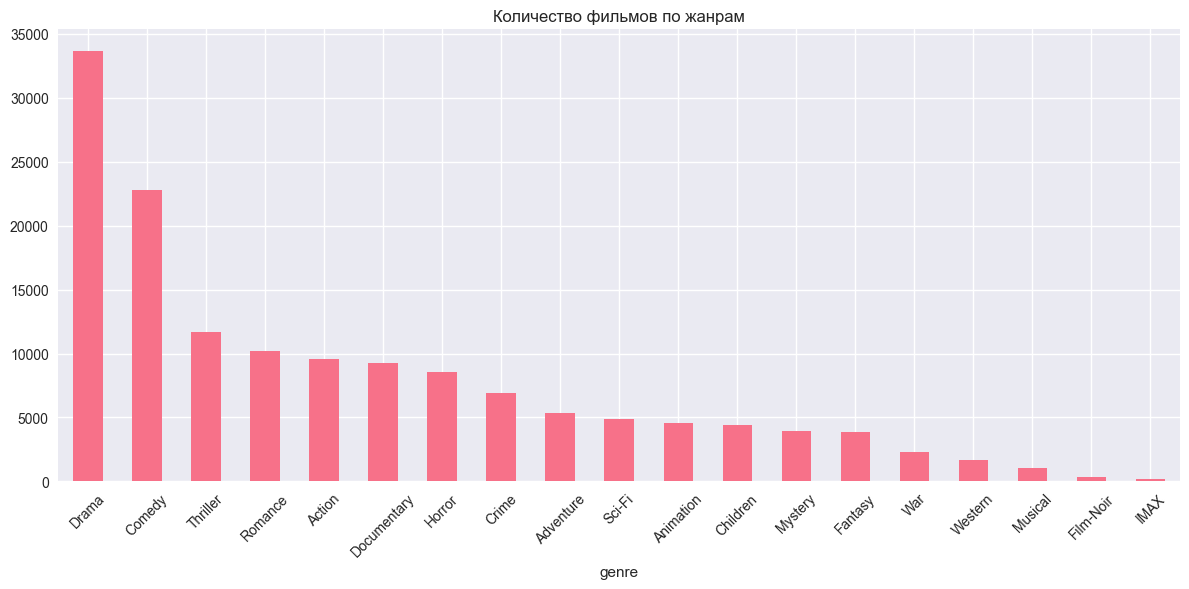

In [11]:
# Создаем отдельную таблицу с разбивкой по жанрам
genres_list = []
for idx, row in movies.iterrows():
    for genre in row['genres'].split('|'):
        if genre != '(no genres listed)':
            genres_list.append({'movieId': row['movieId'], 'genre': genre})

genres_df = pd.DataFrame(genres_list)

print("Статистика по жанрам:")
genre_counts = genres_df['genre'].value_counts()
print(genre_counts)

plt.figure(figsize=(12, 6))
genre_counts.plot(kind='bar')
plt.title('Количество фильмов по жанрам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Топ-10 фильмов по рейтингу (минимум 100 оценок)

In [12]:
movie_ratings = ratings.groupby('movieId').agg({
    'rating': ['mean', 'count'],
    'userId': 'nunique'
}).round(2)
movie_ratings.columns = ['avg_rating', 'rating_count', 'unique_users']

# Объединяем с названиями фильмов
top_movies = movie_ratings[movie_ratings['rating_count'] >= 100].sort_values('avg_rating', ascending=False)
top_movies = top_movies.merge(movies, on='movieId')

print("ТОП-10 фильмов по рейтингу (мин. 100 оценок):")
display(top_movies[['title', 'avg_rating', 'rating_count']].head(10))

🏆 ТОП-10 фильмов по рейтингу (мин. 100 оценок):


,title,avg_rating,rating_count
0,"Shawshank Redemption, The (1994)",4.40,1854
1,"Godfather, The (1972)",4.32,1065
2,"Usual Suspects, The (1995)",4.32,1076
3,Parasite (2019),4.28,192
4,Seven Samurai (Shichinin no samurai) (1954),4.28,257
5,"Lives of Others, The (Das leben der Anderen) (...",4.26,187
6,Schindler's List (1993),4.25,1256
7,Spider-Man: Into the Spider-Verse (2018),4.25,177
8,"Godfather: Part II, The (1974)",4.24,695
9,"Philadelphia Story, The (1940)",4.24,112


Гипотеза 1 - Влияют ли жанры на рейтинг?

Средние рейтинги по жанрам:


,avg_rating,count,std_dev
genre,,,
Film-Noir,3.925,4752,0.907
War,3.795,25036,0.991
Crime,3.699,83838,1.007
Documentary,3.691,6519,1.032
Drama,3.688,218207,0.998
Mystery,3.677,40563,1.009
Animation,3.620,34508,1.042
IMAX,3.607,22919,1.059
Western,3.605,9241,1.017


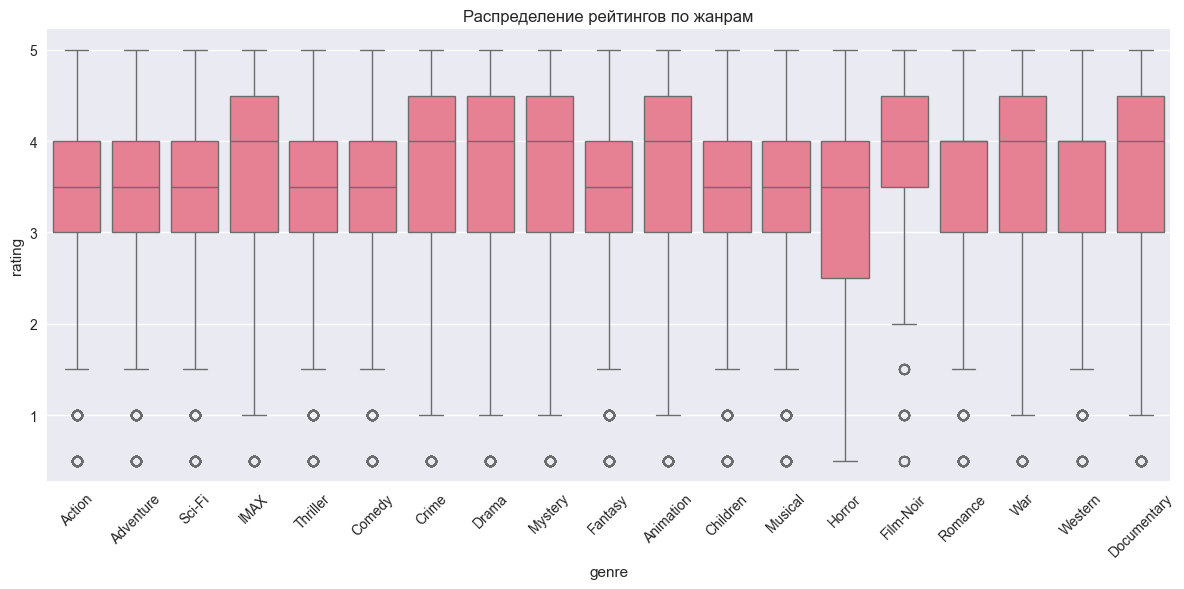

In [13]:
# Объединяем рейтинги с жанрами
ratings_with_genres = ratings.merge(genres_df, on='movieId')

genre_ratings = ratings_with_genres.groupby('genre').agg({
    'rating': ['mean', 'count', 'std']
}).round(3)
genre_ratings.columns = ['avg_rating', 'count', 'std_dev']

print("Средние рейтинги по жанрам:")
display(genre_ratings.sort_values('avg_rating', ascending=False))

# Визуализация
plt.figure(figsize=(12, 6))
sns.boxplot(data=ratings_with_genres, x='genre', y='rating')
plt.title('Распределение рейтингов по жанрам')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Активность пользователей

In [14]:
user_activity = ratings.groupby('userId').agg({
    'rating': 'count',
    'movieId': 'nunique'
}).rename(columns={'rating': 'ratings_count', 'movieId': 'unique_movies'})

print("👥 Статистика по пользователям:")
print(user_activity.describe())

# Самые активные пользователи
print("\nСамые активные пользователи:")
display(user_activity.sort_values('ratings_count', ascending=False).head(10))

👥 Статистика по пользователям:
       ratings_count  unique_movies
count  152650.000000  152650.000000
mean        3.275467       3.275467
std         4.763832       4.763832
min         1.000000       1.000000
25%         1.000000       1.000000
50%         2.000000       2.000000
75%         4.000000       4.000000
max       474.000000     474.000000

Самые активные пользователи:


,ratings_count,unique_movies
userId,,
189614,474,474
207216,137,137
48766,130,130
230765,124,124
175998,123,123
76618,113,113
233891,110,110
184775,109,109
267315,109,109
